## 1. Asset and Liability Trend


Year-wise change in total assets and total liabilities.


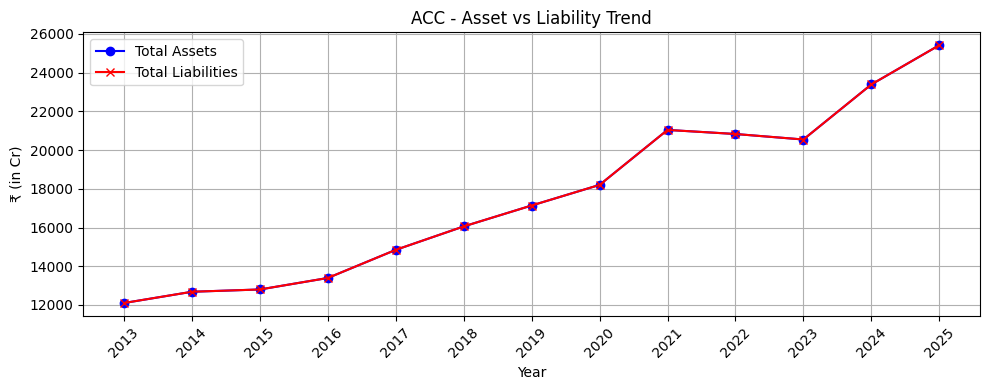

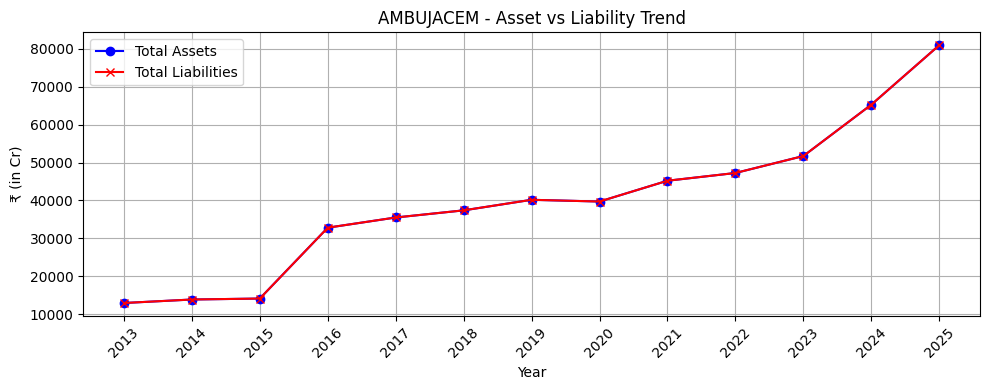

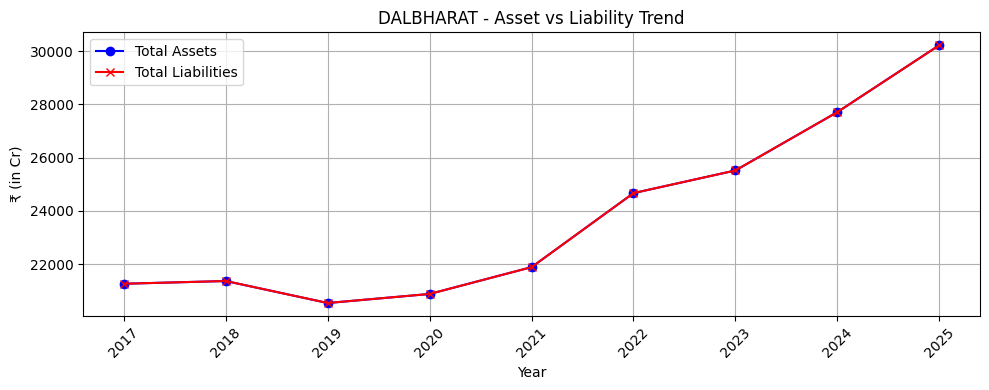

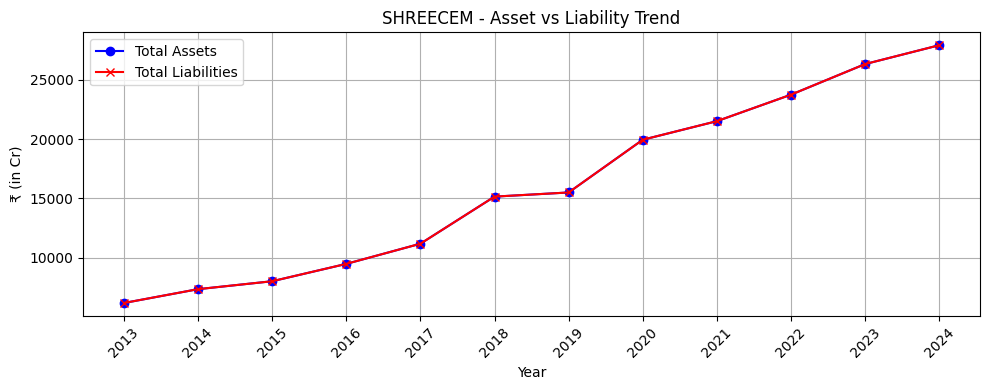

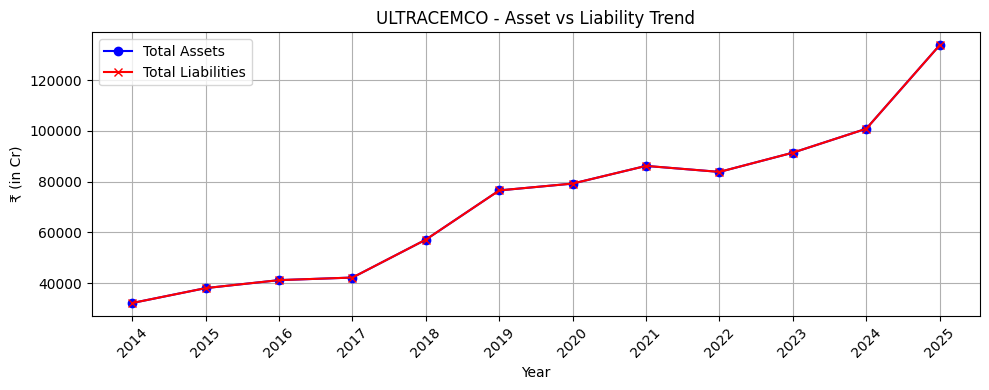

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel(r"C:\Users\ASUS\Desktop\College_Last_sem_pro\git\Riskify\Data\processed\Combined_Balance_With_Average_Median_Yearwise.xlsx")

# Step 1: Filter rows with 'Total Assets' and 'Total Liabilities'
df_filtered = df[df['Financial_Metric'].isin(['Total Assets', 'Total Liabilities'])].copy()

# Step 2: Drop 'Average' and 'Median' company rows
df_filtered = df_filtered[~df_filtered['Company'].str.contains('Average|Median', case=False, na=False)]

# Step 3: Select year columns and convert to numeric
year_cols = [col for col in df_filtered.columns if str(col).isdigit()]
df_filtered[year_cols] = df_filtered[year_cols].apply(pd.to_numeric, errors='coerce')

# Step 4: Polynomial interpolation (degree=2) row-wise
data_numeric = df_filtered[year_cols].transpose()
data_numeric.index = list(map(int, data_numeric.index))  # Ensure numeric index
interpolated = data_numeric.interpolate(method='polynomial', order=2).transpose()
df_filtered[year_cols] = interpolated

# Step 5: Visualization
for company in df_filtered['Company'].unique():
    company_data = df_filtered[df_filtered['Company'] == company]
    if company_data.shape[0] < 2:
        continue
    assets = company_data[company_data['Financial_Metric'] == 'Total Assets'][year_cols].values.flatten()
    liabilities = company_data[company_data['Financial_Metric'] == 'Total Liabilities'][year_cols].values.flatten()

    plt.figure(figsize=(10, 4))
    plt.plot(year_cols, assets, marker='o', label='Total Assets', color='blue')
    plt.plot(year_cols, liabilities, marker='x', label='Total Liabilities', color='red')
    plt.title(f"{company.replace('_Balance_Sheet', '')} - Asset vs Liability Trend")
    plt.xlabel("Year")
    plt.ylabel("₹ (in Cr)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


Compare current vs. non-current assets/liabilities.


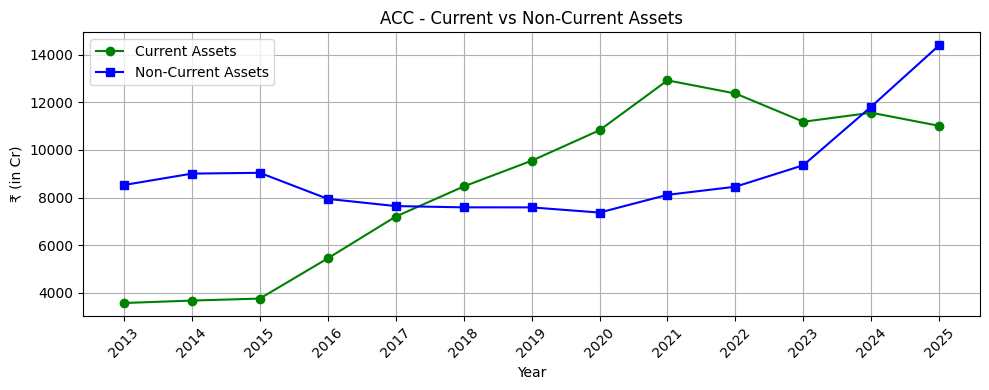

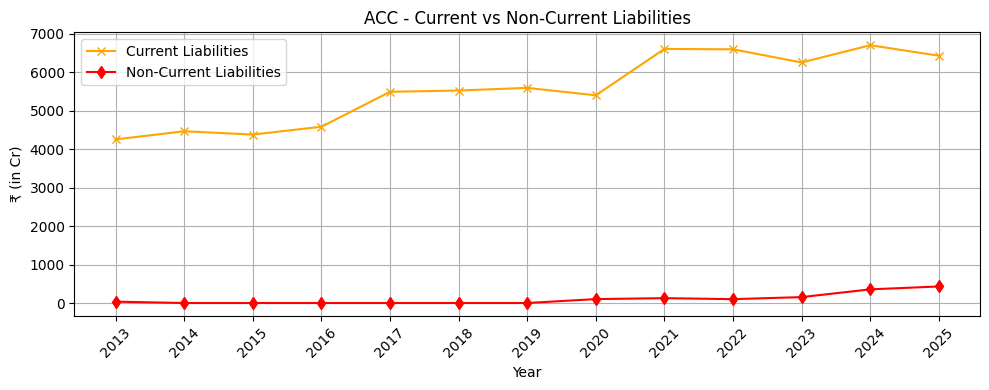

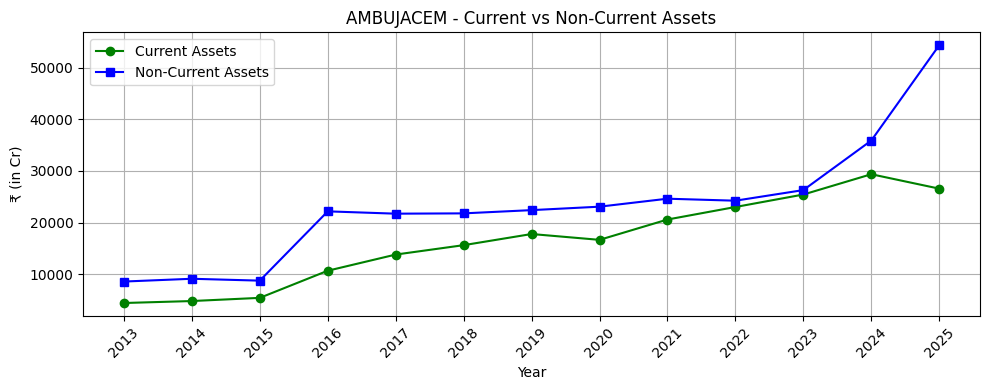

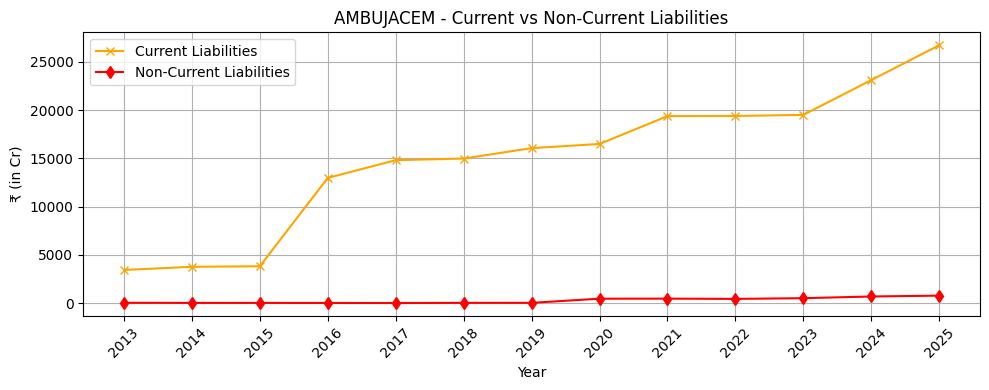

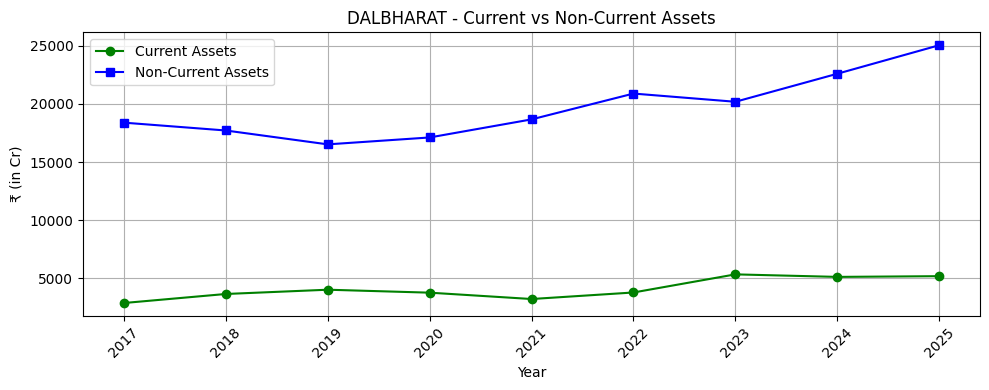

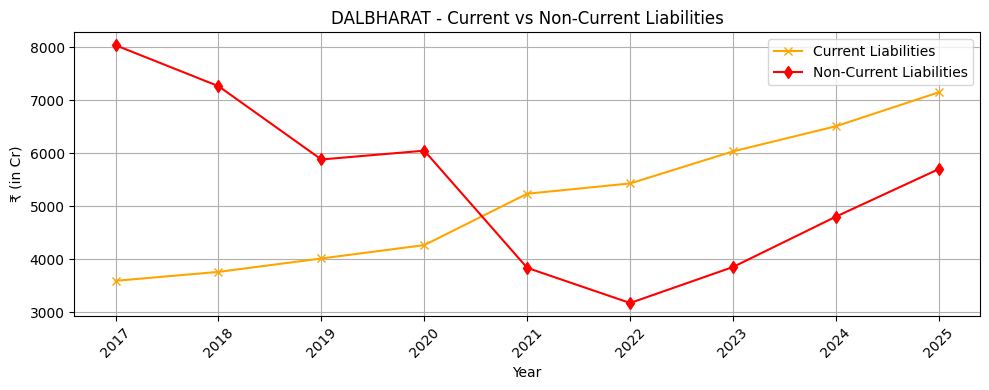

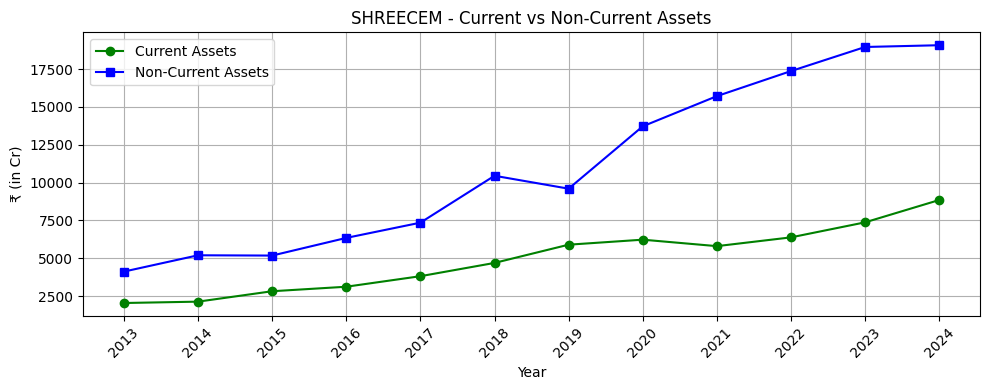

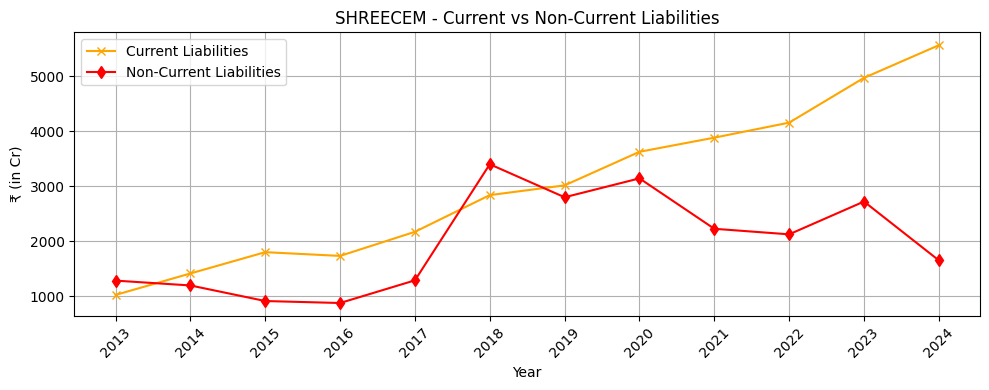

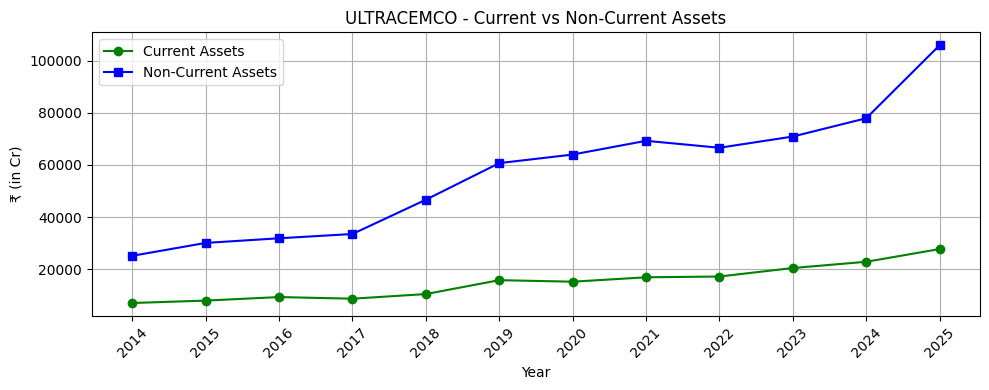

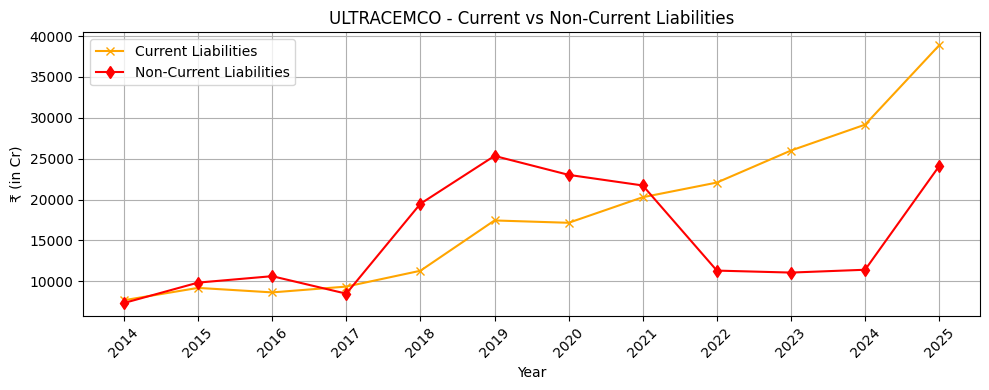

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded and preprocessed similarly to your previous steps

# Filter relevant financial metrics
required_metrics = ['Other Assets', 'Fixed Assets', 'CWIP', 'Investments', 'Other Liabilities', 'Borrowings']
df_subset = df[df['Financial_Metric'].isin(required_metrics)].copy()
df_subset = df_subset[~df_subset['Company'].str.contains('Average|Median', case=False, na=False)]

# Identify year columns
year_cols = [col for col in df_subset.columns if str(col).isdigit()]
df_subset[year_cols] = df_subset[year_cols].apply(pd.to_numeric, errors='coerce')

# Interpolation helper
def interp(arr):
    s = pd.Series(arr, index=list(map(int, year_cols)))
    return s.interpolate(method='polynomial', order=2).values

companies = df_subset['Company'].unique()

for company in companies:
    company_data = df_subset[df_subset['Company'] == company]

    # Extract individual metrics
    other_assets = company_data[company_data['Financial_Metric'] == 'Other Assets'][year_cols].values.flatten()
    fixed_assets = company_data[company_data['Financial_Metric'] == 'Fixed Assets'][year_cols].values.flatten()
    cwip = company_data[company_data['Financial_Metric'] == 'CWIP'][year_cols].values.flatten()
    investments = company_data[company_data['Financial_Metric'] == 'Investments'][year_cols].values.flatten()
    other_liabilities = company_data[company_data['Financial_Metric'] == 'Other Liabilities'][year_cols].values.flatten()
    borrowings = company_data[company_data['Financial_Metric'] == 'Borrowings'][year_cols].values.flatten()

    # Calculate aggregates
    current_assets = interp(other_assets)
    non_current_assets = interp(fixed_assets + cwip + investments)
    current_liabilities = interp(other_liabilities)
    non_current_liabilities = interp(borrowings)

    # Plot Current vs Non-Current Assets
    plt.figure(figsize=(10, 4))
    plt.plot(year_cols, current_assets, marker='o', label='Current Assets', color='green')
    plt.plot(year_cols, non_current_assets, marker='s', label='Non-Current Assets', color='blue')
    plt.title(f"{company.replace('_Balance_Sheet', '')} - Current vs Non-Current Assets")
    plt.xlabel("Year")
    plt.ylabel("₹ (in Cr)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
      # Plot Current vs Non-Current Liabilities
    plt.figure(figsize=(10, 4))
    plt.plot(year_cols, current_liabilities, marker='x', label='Current Liabilities', color='orange')
    plt.plot(year_cols, non_current_liabilities, marker='d', label='Non-Current Liabilities', color='red')
    plt.title(f"{company.replace('_Balance_Sheet', '')} - Current vs Non-Current Liabilities")
    plt.xlabel("Year")
    plt.ylabel("₹ (in Cr)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()




# 2. Equity and Debt Analysis


Track share capital and reserves.





In [4]:
print(df.columns)


Index(['Financial_Metric', 'Company', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025'],
      dtype='object')


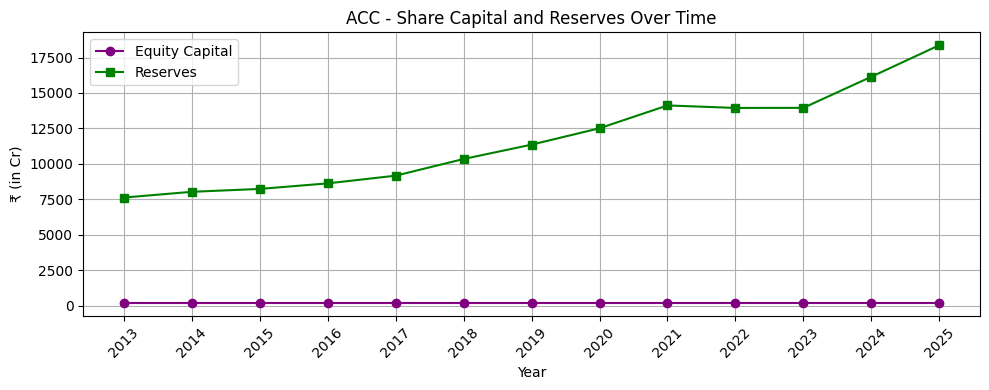

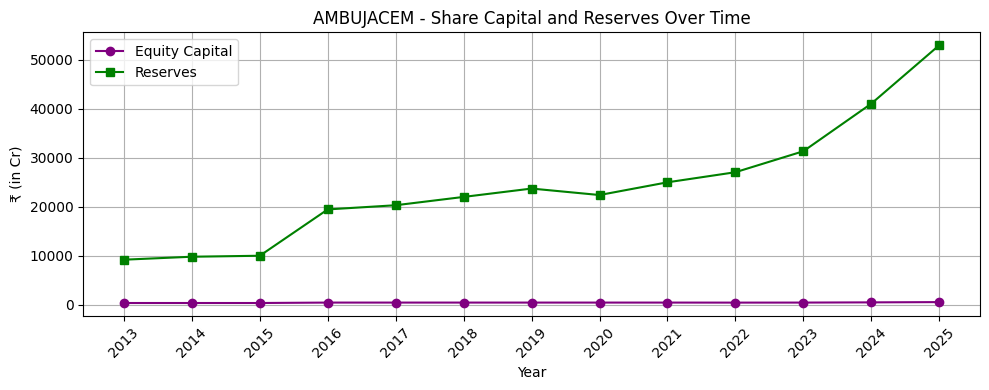

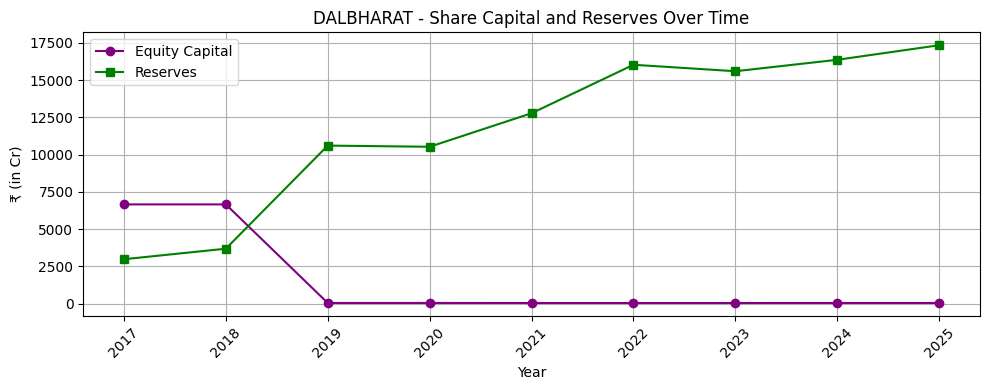

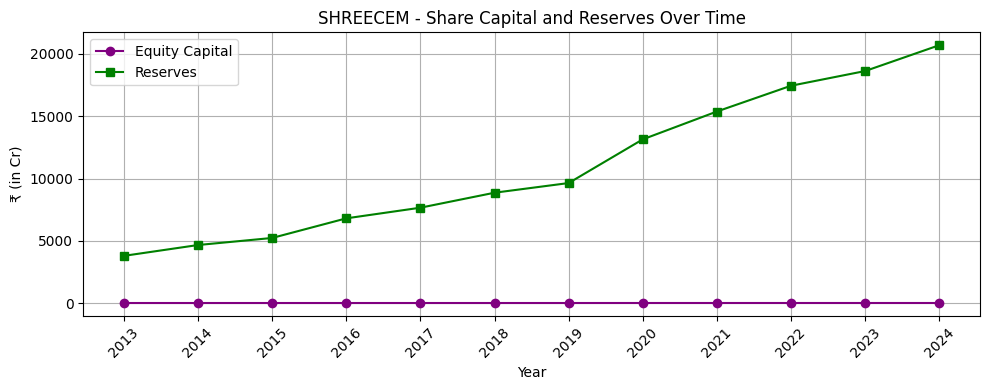

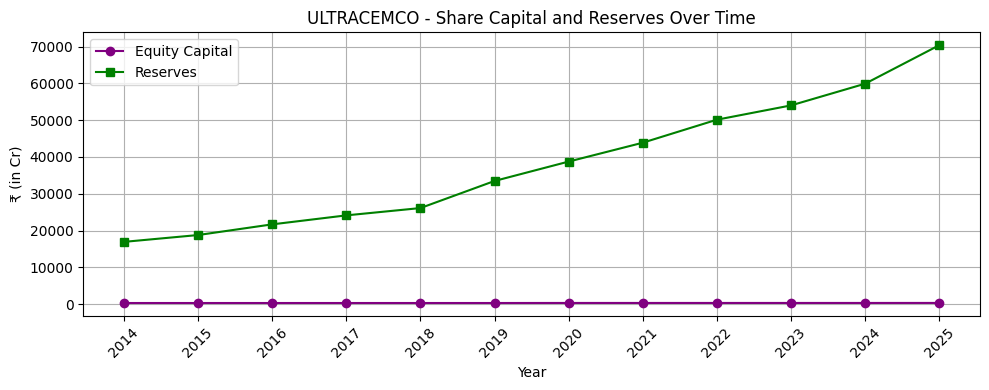

In [5]:
# Step 1: Filter for Equity Capital and Reserves
df_equity_debt = df[df['Financial_Metric'].isin(['Equity Capital', 'Reserves'])].copy()

# Step 2: Drop 'Average' and 'Median' rows
df_equity_debt = df_equity_debt[~df_equity_debt['Company'].str.contains('Average|Median', case=False, na=False)]

# Step 3: Convert year columns to numeric
df_equity_debt[year_cols] = df_equity_debt[year_cols].apply(pd.to_numeric, errors='coerce')

# Step 4: Polynomial Interpolation for missing values
data_eq_numeric = df_equity_debt[year_cols].transpose()
data_eq_numeric.index = list(map(int, data_eq_numeric.index))
interpolated_eq = data_eq_numeric.interpolate(method='polynomial', order=2).transpose()
df_equity_debt[year_cols] = interpolated_eq

# Step 5: Plot Share Capital and Reserves Over Time for each company
for company in df_equity_debt['Company'].unique():
    company_data = df_equity_debt[df_equity_debt['Company'] == company]
    if company_data.shape[0] < 2:
        continue
    equity = company_data[company_data['Financial_Metric'] == 'Equity Capital'][year_cols].values.flatten()
    reserves = company_data[company_data['Financial_Metric'] == 'Reserves'][year_cols].values.flatten()

    plt.figure(figsize=(10, 4))
    plt.plot(year_cols, equity, marker='o', label='Equity Capital', color='purple')
    plt.plot(year_cols, reserves, marker='s', label='Reserves', color='green')
    plt.title(f"{company.replace('_Balance_Sheet', '')} - Share Capital and Reserves Over Time")
    plt.xlabel("Year")
    plt.ylabel("₹ (in Cr)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


 Calculate Change and Growth Rate in Share Capital and Reserves

No change in Equity Capital: It remained the same each year, meaning the company did not issue new shares or buy back any shares during this period.

In [112]:
import pandas as pd

# Use the same df_equity_debt you prepared earlier
results = []

for company in df_equity_debt['Company'].unique():
    company_data = df_equity_debt[df_equity_debt['Company'] == company]
    if company_data.shape[0] < 2:
        continue

    # Extract Equity and Reserves
    equity = company_data[company_data['Financial_Metric'] == 'Equity Capital'][year_cols].values.flatten()
    reserves = company_data[company_data['Financial_Metric'] == 'Reserves'][year_cols].values.flatten()

    for i in range(1, len(year_cols)):
        year = int(year_cols[i])
        prev_year = int(year_cols[i-1])
        
        equity_change = equity[i] - equity[i-1]
        equity_growth = ((equity[i] - equity[i-1]) / abs(equity[i-1]) * 100) if equity[i-1] != 0 else None

        reserves_change = reserves[i] - reserves[i-1]
        reserves_growth = ((reserves[i] - reserves[i-1]) / abs(reserves[i-1]) * 100) if reserves[i-1] != 0 else None

        results.append({
            "Company": company.replace('_Balance_Sheet', ''),
            "Year": f"{prev_year}-{year}",
            "Equity_Change": equity_change,
            "Equity_Growth_%": equity_growth,
            "Reserves_Change": reserves_change,
            "Reserves_Growth_%": reserves_growth
        })

# Convert to DataFrame
growth_df = pd.DataFrame(results)

# Display the result
pd.set_option('display.float_format', '{:.2f}'.format)
print(growth_df.head())



  Company       Year  Equity_Change  Equity_Growth_%  Reserves_Change  \
0     ACC  2013-2014           0.00             0.00           405.00   
1     ACC  2014-2015           0.00             0.00           203.00   
2     ACC  2015-2016           0.00             0.00           392.00   
3     ACC  2016-2017           0.00             0.00           543.00   
4     ACC  2017-2018           0.00             0.00          1176.00   

   Reserves_Growth_%  
0               5.31  
1               2.53  
2               4.76  
3               6.30  
4              12.83  


Analyze long-term vs. short-term borrowings.

In financial data:

Long-term borrowings (non-current liabilities): Debts due after 12 months, such as bonds, term loans.

Short-term borrowings (current liabilities): Debts due within 12 months, often included under "Other Liabilities" or explicitly labeled.

In [7]:
# Filter necessary metrics
borrow_df = df[df['Financial_Metric'].isin(['Borrowings', 'Other Liabilities'])].copy()

# Remove Average and Median rows
borrow_df = borrow_df[~borrow_df['Company'].str.contains('Average|Median', case=False, na=False)]

# Convert year columns to numeric
year_cols = [col for col in borrow_df.columns if str(col).isdigit()]
borrow_df[year_cols] = borrow_df[year_cols].apply(pd.to_numeric, errors='coerce')

# Reshape to long format
melted = borrow_df.melt(id_vars=['Company', 'Financial_Metric'], value_vars=year_cols,
                        var_name='Year', value_name='Value')
melted['Year'] = melted['Year'].astype(int)

# Pivot to wide format
pivot = melted.pivot_table(index=['Company', 'Year'], columns='Financial_Metric', values='Value').reset_index()

# Rename for clarity
pivot.rename(columns={
    'Borrowings': 'Long_Term_Borrowings',
    'Other Liabilities': 'Short_Term_Borrowings'
}, inplace=True)

# Sort
pivot.sort_values(['Company', 'Year'], inplace=True)

In [8]:
# Calculate borrowing composition ratios
pivot['Total_Borrowings'] = pivot['Long_Term_Borrowings'] + pivot['Short_Term_Borrowings']
pivot['LT_Borrowing_%'] = (pivot['Long_Term_Borrowings'] / pivot['Total_Borrowings']) * 100
pivot['ST_Borrowing_%'] = (pivot['Short_Term_Borrowings'] / pivot['Total_Borrowings']) * 100


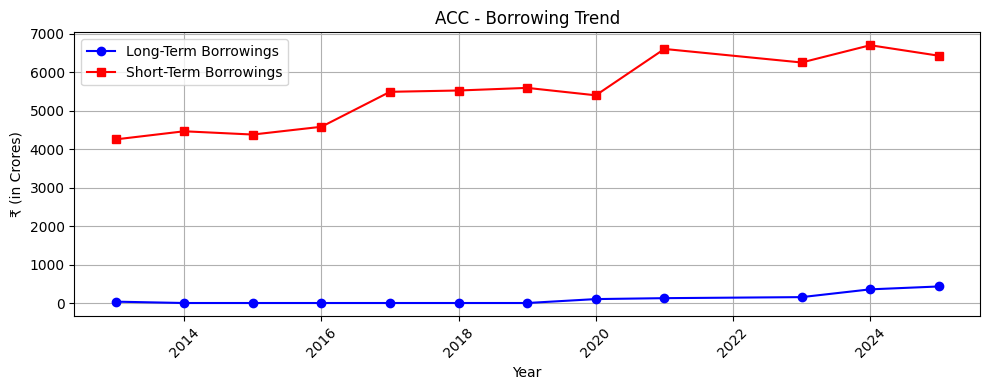

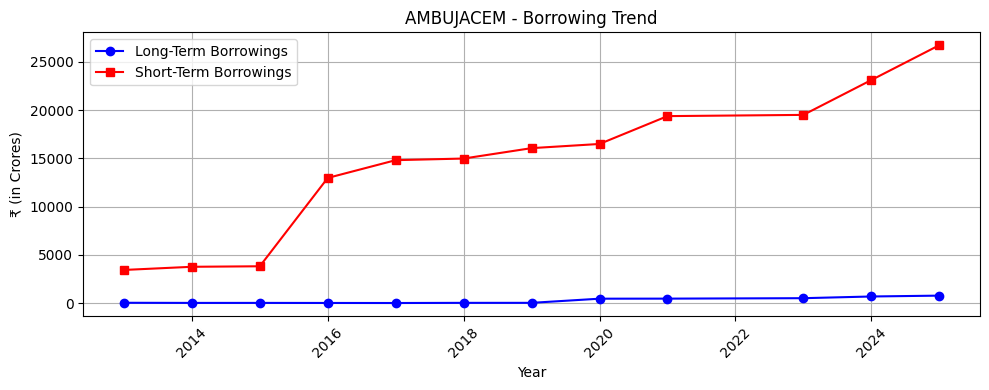

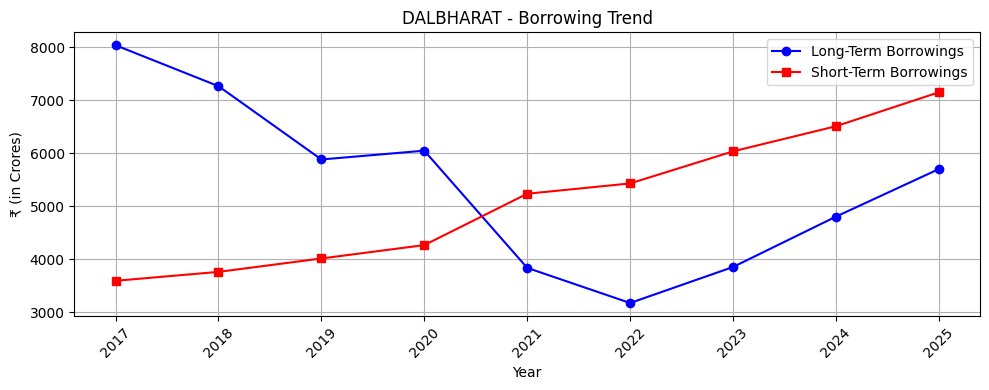

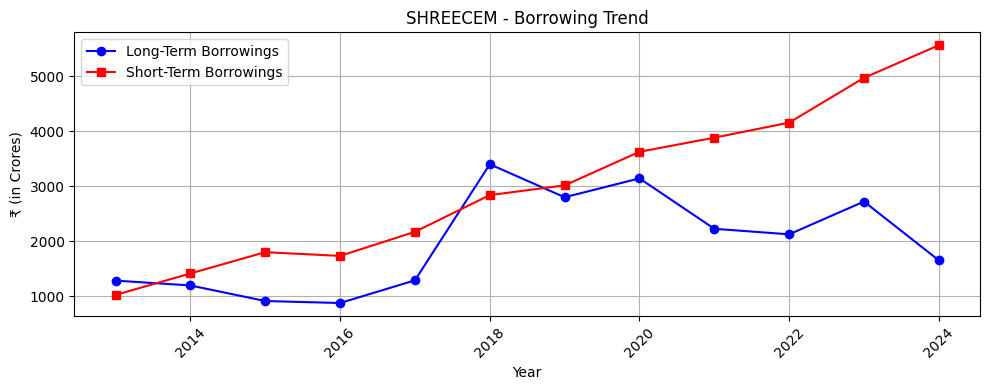

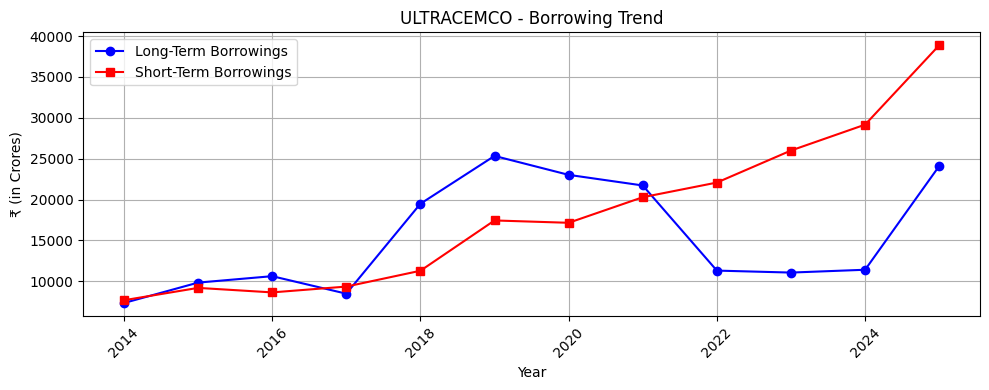

In [9]:
for company in pivot['Company'].unique():
    company_df = pivot[pivot['Company'] == company]

    plt.figure(figsize=(10, 4))
    plt.plot(company_df['Year'], company_df['Long_Term_Borrowings'], marker='o', label='Long-Term Borrowings', color='blue')
    plt.plot(company_df['Year'], company_df['Short_Term_Borrowings'], marker='s', label='Short-Term Borrowings', color='red')
    plt.title(f"{company.replace('_Balance_Sheet', '')} - Borrowing Trend")
    plt.xlabel('Year')
    plt.ylabel('₹ (in Crores)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# 3. Leverage Ratios


Debt/Equity Ratio = Total Debt / Shareholder’s Equity.


Debt/Equity Ratio evaluates a company's financial leverage by comparing its total debt to shareholders' equity:


In [11]:
# Keep only relevant metrics
relevant_metrics = ['Borrowings', 'Equity Capital', 'Reserves']
df_filtered = df[df['Financial_Metric'].isin(relevant_metrics)].copy()

# Remove average/median rows
df_filtered = df_filtered[~df_filtered['Company'].str.contains('Average|Median', case=False, na=False)]

year_cols = [col for col in df_filtered.columns if str(col).isdigit()]
df_filtered[year_cols] = df_filtered[year_cols].apply(pd.to_numeric, errors='coerce')


In [12]:
melted = df_filtered.melt(id_vars=['Company', 'Financial_Metric'], value_vars=year_cols,
                          var_name='Year', value_name='Value')
melted['Year'] = melted['Year'].astype(int)
pivot_df = melted.pivot_table(index=['Company', 'Year'], columns='Financial_Metric', values='Value').reset_index()

# Rename for clarity
pivot_df.rename(columns={
    'Borrowings': 'Total_Debt',
    'Equity Capital': 'Equity_Capital',
    'Reserves': 'Reserves'
}, inplace=True)


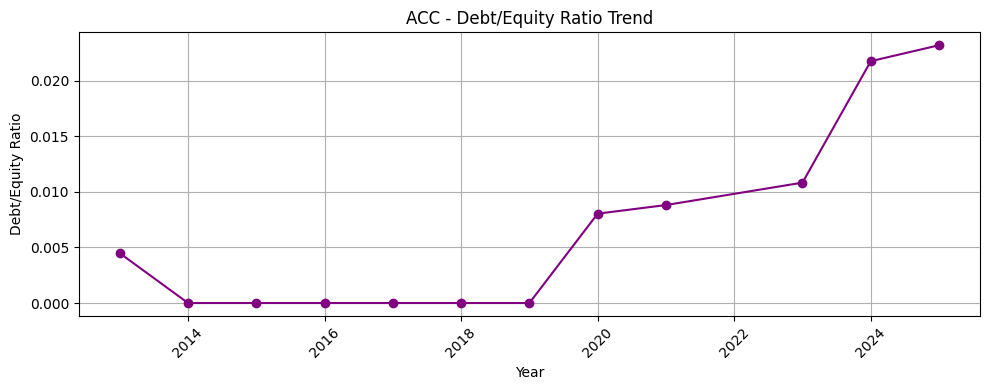

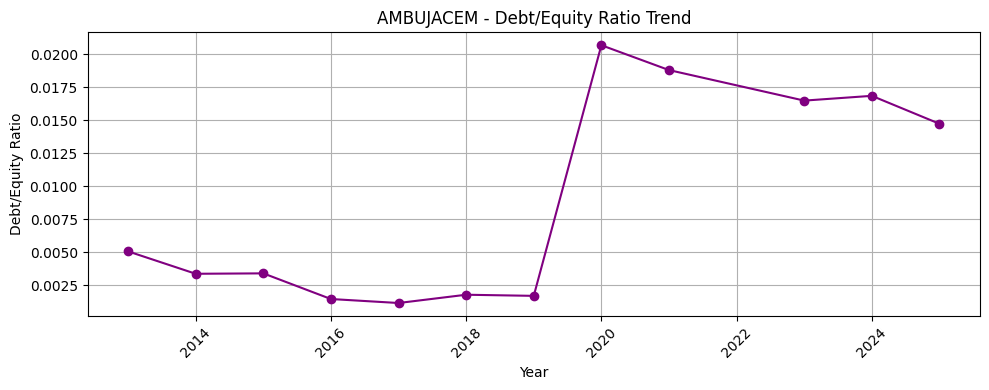

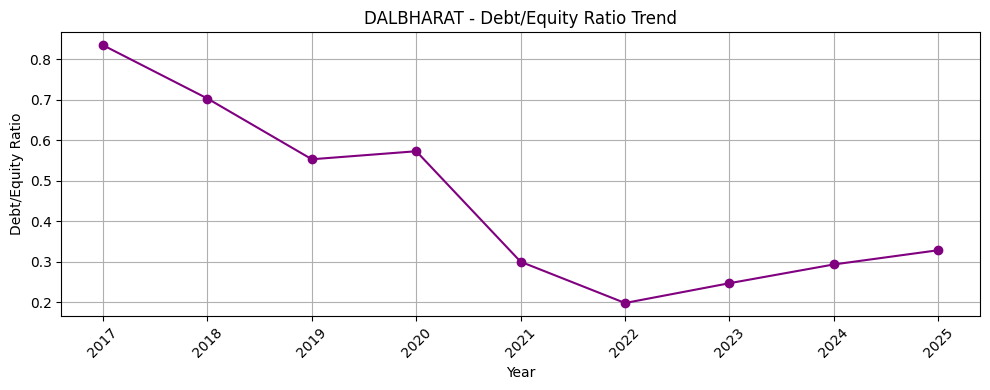

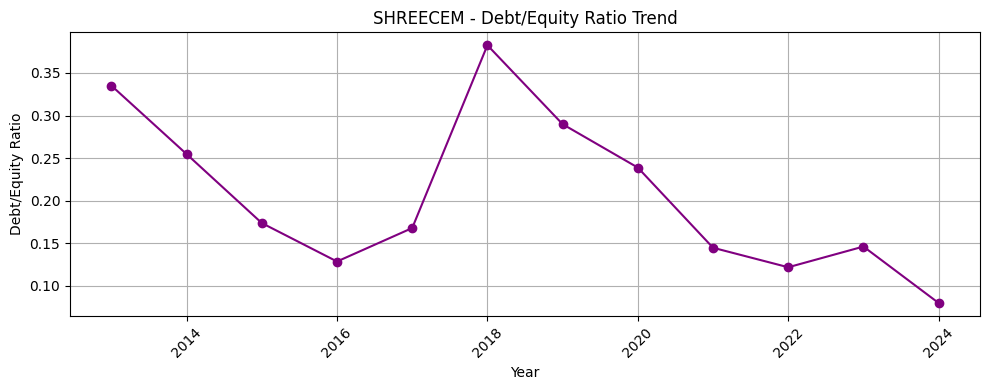

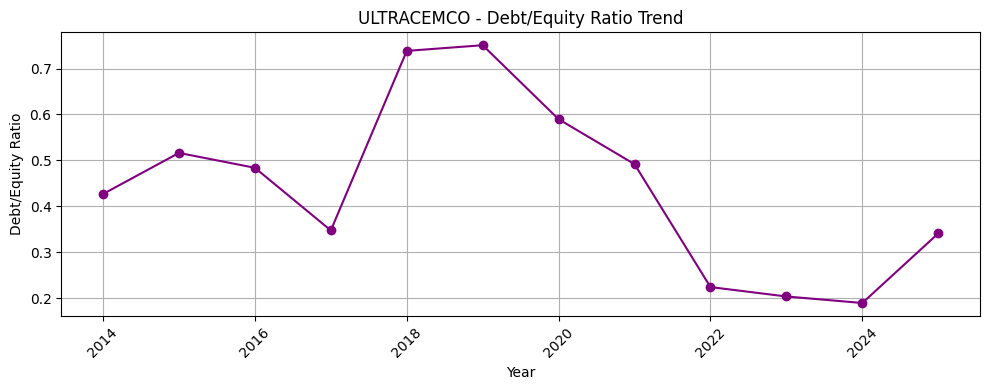

In [13]:
# Debt/Equity Ratio	Meaning
# < 1	Low leverage: conservative capital structure
# ≈ 1	Balanced debt and equity
# > 2	High leverage: riskier for creditors
pivot_df['Shareholders_Equity'] = pivot_df['Equity_Capital'] + pivot_df['Reserves']
pivot_df['Debt_Equity_Ratio'] = pivot_df['Total_Debt'] / pivot_df['Shareholders_Equity']

import matplotlib.pyplot as plt

for company in pivot_df['Company'].unique():
    company_df = pivot_df[pivot_df['Company'] == company]

    plt.figure(figsize=(10, 4))
    plt.plot(company_df['Year'], company_df['Debt_Equity_Ratio'], marker='o', color='purple')
    plt.title(f"{company.replace('_Balance_Sheet', '')} - Debt/Equity Ratio Trend")
    plt.xlabel("Year")
    plt.ylabel("Debt/Equity Ratio")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



Interest Coverage Ratio (if interest expense is available).




In [5]:
import pandas as pd

# Load Profit & Loss data
pl_df = pd.read_excel(r"C:\Users\ASUS\Desktop\College_Last_sem_pro\git\Riskify\Data\processed\Combined_PnL_Yearwise.xlsx")

# Step 1: Filter required metrics
pl_filtered = pl_df[pl_df['Financial_Metric'].isin(['Operating Profit', 'Interest'])].copy()

# Step 2: Extract year columns (those with digits)
year_cols = [col for col in pl_filtered.columns if any(char.isdigit() for char in str(col))]

# Step 3: Melt the dataframe to long format
pl_long = pl_filtered.melt(id_vars=['Company', 'Financial_Metric'], value_vars=year_cols,
                           var_name='Year', value_name='Amount')

# Step 4: Extract year number from column names
pl_long['Year'] = pl_long['Year'].str.extract(r'(\d{4})').astype(int)

# Step 5: Pivot so 'Operating Profit' and 'Interest' become columns
pl_pivot = pl_long.pivot_table(index=['Company', 'Year'], columns='Financial_Metric', values='Amount').reset_index()

# Step 6: Ensure numeric values
pl_pivot['Operating Profit'] = pd.to_numeric(pl_pivot['Operating Profit'], errors='coerce')
pl_pivot['Interest'] = pd.to_numeric(pl_pivot['Interest'], errors='coerce')

# Step 7: Calculate Interest Coverage Ratio
pl_pivot['Interest_Coverage_Ratio'] = pl_pivot['Operating Profit'] / pl_pivot['Interest']
pl_pivot['Interest_Coverage_Ratio'] = pl_pivot['Interest_Coverage_Ratio'].replace([float('inf'), -float('inf')], pd.NA)

# Step 8: Final Result
result_df = pl_pivot[['Company', 'Year', 'Operating Profit', 'Interest', 'Interest_Coverage_Ratio']]
print(result_df.dropna().head())


Financial_Metric            Company  Year  Operating Profit  Interest  \
0                 ACC_Profit_&_Loss  2013            1646.0     114.0   
1                 ACC_Profit_&_Loss  2014            1529.0      83.0   
2                 ACC_Profit_&_Loss  2015            1583.0      65.0   
3                 ACC_Profit_&_Loss  2016            1458.0      79.0   
4                 ACC_Profit_&_Loss  2017            1915.0      99.0   

Financial_Metric  Interest_Coverage_Ratio  
0                               14.438596  
1                               18.421687  
2                               24.353846  
3                               18.455696  
4                               19.343434  


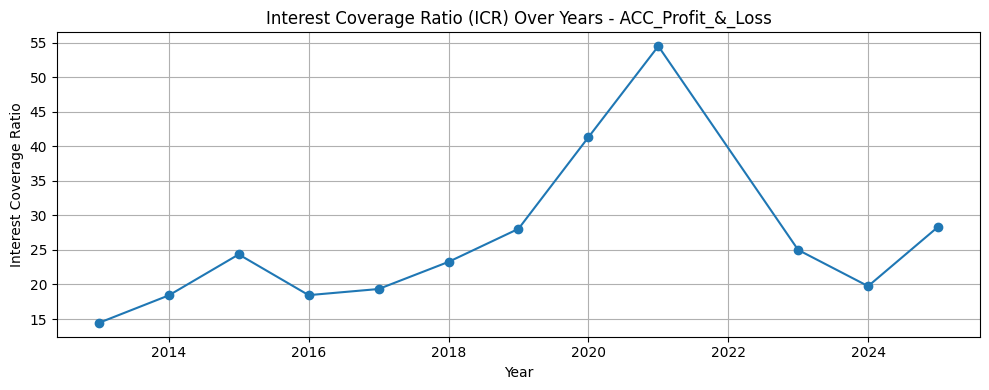

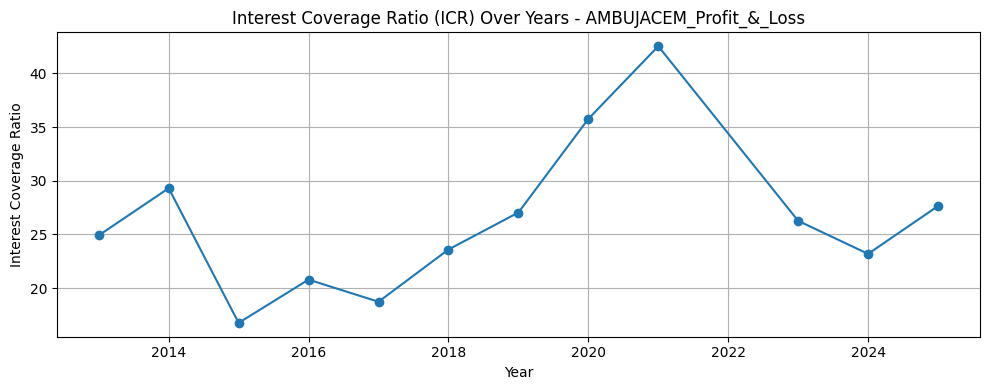

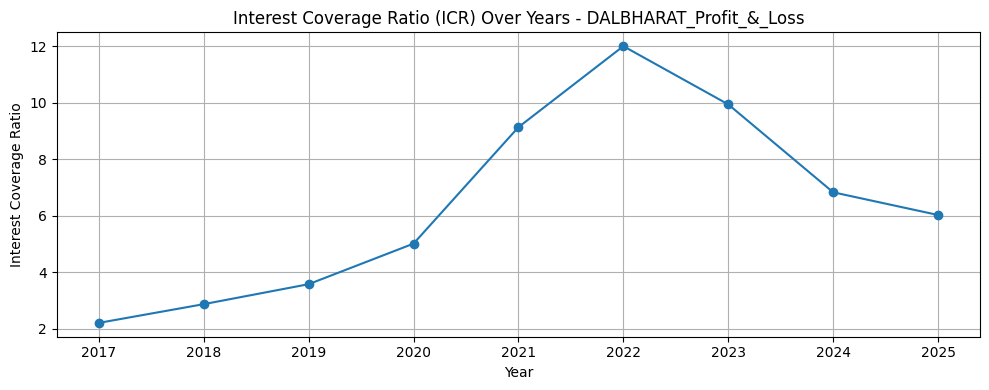

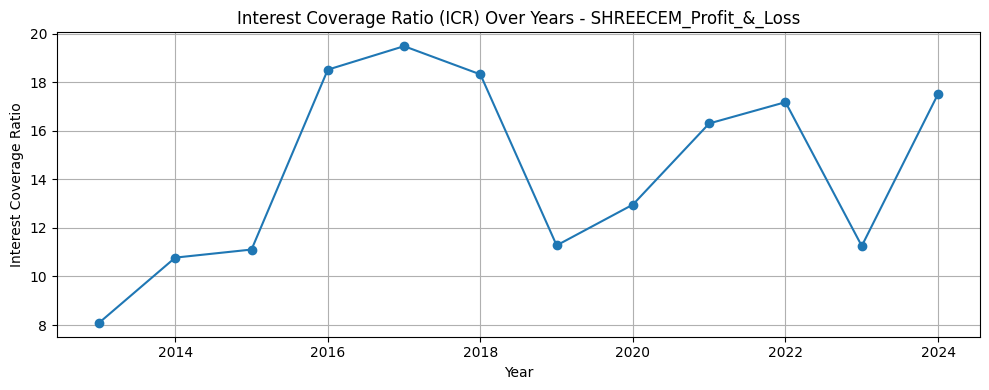

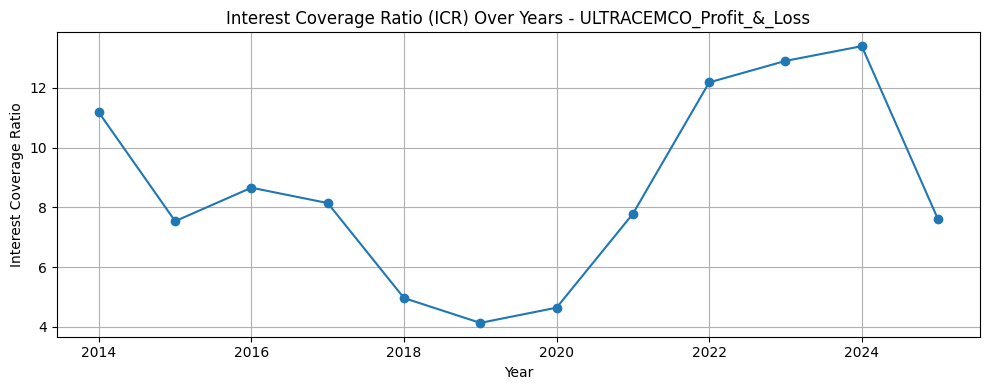

In [6]:
import matplotlib.pyplot as plt

# Filter out rows with missing ICR
plot_df = result_df.dropna(subset=['Interest_Coverage_Ratio'])

# Plot ICR year-wise for each company
for company in plot_df['Company'].unique():
    company_df = plot_df[plot_df['Company'] == company]
    
    plt.figure(figsize=(10, 4))
    plt.plot(company_df['Year'], company_df['Interest_Coverage_Ratio'], marker='o', linestyle='-')
    plt.title(f'Interest Coverage Ratio (ICR) Over Years - {company}')
    plt.xlabel('Year')
    plt.ylabel('Interest Coverage Ratio')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# 4. Efficiency Metrics


Asset Turnover Ratio = Revenue / Total Assets.







In [23]:
# Step 1: Clean Balance Sheet data
bs_df = bs_df[~bs_df['Company'].str.contains('Average|Median', case=False, na=False)]

# Extract first 3 letters as Company Code
bs_df['Company_Code'] = bs_df['Company'].str[:3].str.upper()

bs_filtered = bs_df[bs_df['Financial_Metric'] == 'Total Assets']

# Step 2: Clean P&L data
pl_df = pl_df[~pl_df['Company'].str.contains('Average|Median', case=False, na=False)]

# Extract first 3 letters as Company Code
pl_df['Company_Code'] = pl_df['Company'].str[:3].str.upper()

pl_filtered = pl_df[pl_df['Financial_Metric'] == 'Sales']

# Step 3: Get all year columns (those with digits)
year_cols = [col for col in pl_filtered.columns if any(char.isdigit() for char in str(col))]

# Step 4: Melt both datasets to long format
pl_long = pl_filtered.melt(id_vars=['Company_Code', 'Financial_Metric'], value_vars=year_cols,
                           var_name='Year', value_name='Revenue')

bs_long = bs_filtered.melt(id_vars=['Company_Code', 'Financial_Metric'], value_vars=year_cols,
                           var_name='Year', value_name='Total_Assets')

# Step 5: Clean year column - extract year digits and convert to int
pl_long['Year'] = pl_long['Year'].str.extract(r'(\d{4})').astype(int)
bs_long['Year'] = bs_long['Year'].str.extract(r'(\d{4})').astype(int)

# Step 6: Merge on Company_Code and Year
merged_df = pd.merge(pl_long[['Company_Code', 'Year', 'Revenue']],
                     bs_long[['Company_Code', 'Year', 'Total_Assets']],
                     on=['Company_Code', 'Year'], how='inner')

# Step 7: Convert Revenue and Total_Assets to numeric
merged_df['Revenue'] = pd.to_numeric(merged_df['Revenue'], errors='coerce')
merged_df['Total_Assets'] = pd.to_numeric(merged_df['Total_Assets'], errors='coerce')

# Step 8: Calculate Asset Turnover Ratio
merged_df['Asset_Turnover_Ratio'] = merged_df['Revenue'] / merged_df['Total_Assets']
merged_df['Asset_Turnover_Ratio'] = merged_df['Asset_Turnover_Ratio'].replace([float('inf'), -float('inf')], pd.NA)

# Step 9: View result
print(merged_df[['Company_Code', 'Year', 'Revenue', 'Total_Assets', 'Asset_Turnover_Ratio']].dropna().head())

  Company_Code  Year  Revenue  Total_Assets  Asset_Turnover_Ratio
1          AMB  2013   9161.0       12956.0              0.707086
3          ACC  2013  11062.0       12101.0              0.914139
4          SHR  2013   5418.0        6160.0              0.879545
6          AMB  2014   9955.0       13878.0              0.717322
7          ULT  2014  20730.0       32185.0              0.644089


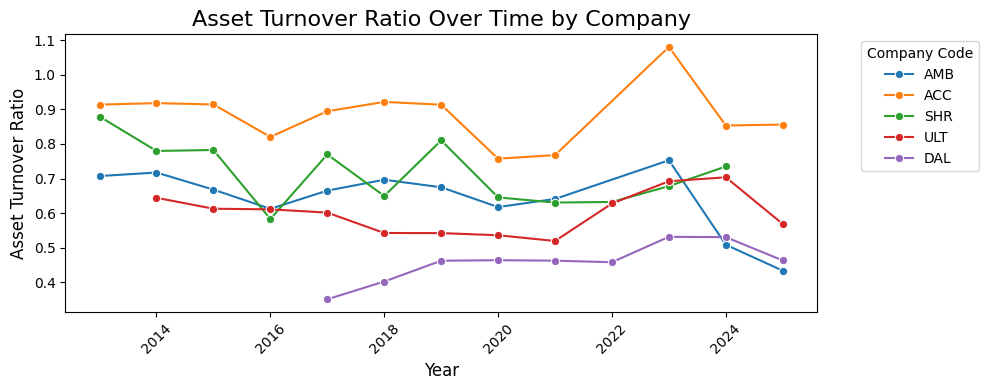

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Drop NaNs
plot_df = merged_df.dropna(subset=['Asset_Turnover_Ratio'])

# Step 2: Initialize plot
plt.figure(figsize=(10, 4))
sns.lineplot(data=plot_df, x='Year', y='Asset_Turnover_Ratio', hue='Company_Code', marker='o')

# Step 3: Titles and labels
plt.title('Asset Turnover Ratio Over Time by Company', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Asset Turnover Ratio', fontsize=12)
plt.legend(title='Company Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Step 4: Show plot
plt.show()


Capital Employed = Total Assets - Current Liabilities.

In [28]:
import pandas as pd

# Load Balance Sheet data
bs_df = pd.read_excel(r"C:\Users\ASUS\Desktop\College_Last_sem_pro\git\Riskify\Data\processed\Combined_Balance_With_Average_Median_Yearwise.xlsx")

# Remove average/median rows
bs_df = bs_df[~bs_df['Company'].str.contains('Average|Median', case=False, na=False)]

# Create Company Code (first 3 letters)
bs_df['Company_Code'] = bs_df['Company'].str[:3].str.upper()

# Filter needed metrics
needed_metrics = ['Total Assets', 'Total Liabilities', 'Borrowings', 'Other Liabilities']
bs_filtered = bs_df[bs_df['Financial_Metric'].isin(needed_metrics)]

# Extract year columns
year_cols = [col for col in bs_filtered.columns if str(col).isdigit()]

# Melt to long format
bs_long = bs_filtered.melt(id_vars=['Company_Code', 'Financial_Metric'], value_vars=year_cols,
                           var_name='Year', value_name='Amount')
bs_long['Year'] = bs_long['Year'].astype(int)

# Pivot to make metrics into columns
pivot_df = bs_long.pivot_table(index=['Company_Code', 'Year'], columns='Financial_Metric', values='Amount').reset_index()

# Convert to numeric
for col in ['Total Assets', 'Total Liabilities', 'Borrowings', 'Other Liabilities']:
    pivot_df[col] = pd.to_numeric(pivot_df[col], errors='coerce')

# Calculate Current Liabilities
pivot_df['Current_Liabilities'] = pivot_df['Total Liabilities'] - pivot_df['Borrowings'] - pivot_df['Other Liabilities']

# Calculate Capital Employed
pivot_df['Capital_Employed'] = pivot_df['Total Assets'] - pivot_df['Current_Liabilities']

# Final output
print(pivot_df[['Company_Code', 'Year', 'Total Assets', 'Current_Liabilities', 'Capital_Employed']].dropna().head())


Financial_Metric Company_Code  Year  Total Assets  Current_Liabilities  \
0                         ACC  2013       12101.0               7813.0   
1                         ACC  2014       12682.0               8218.0   
2                         ACC  2015       12800.0               8421.0   
3                         ACC  2016       13394.0               8813.0   
4                         ACC  2017       14846.0               9356.0   

Financial_Metric  Capital_Employed  
0                           4288.0  
1                           4464.0  
2                           4379.0  
3                           4581.0  
4                           5490.0  


# 5. Visualization


Multi-line chart for Assets vs. Liabilities vs. Equity.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Balance Sheet
bs_df = pd.read_excel(r"C:\Users\ASUS\Desktop\College_Last_sem_pro\git\Riskify\Data\processed\Combined_Balance_With_Average_Median_Yearwise.xlsx")

# Remove average/median rows
bs_df = bs_df[~bs_df['Company'].str.contains('Average|Median', case=False, na=False)]

# Extract company code
bs_df['Company_Code'] = bs_df['Company'].str[:3].str.upper()

# Filter relevant metrics
relevant_metrics = ['Total Assets', 'Total Liabilities', 'Equity Capital', 'Reserves']
bs_filtered = bs_df[bs_df['Financial_Metric'].isin(relevant_metrics)]

# Get year columns
year_cols = [col for col in bs_filtered.columns if str(col).isdigit()]

# Melt to long format
melted = bs_filtered.melt(id_vars=['Company_Code', 'Financial_Metric'], value_vars=year_cols,
                          var_name='Year', value_name='Value')
melted['Year'] = melted['Year'].astype(int)

# Pivot to wide format
pivot = melted.pivot_table(index=['Company_Code', 'Year'], columns='Financial_Metric', values='Value').reset_index()

# Convert to numeric
for col in ['Total Assets', 'Total Liabilities', 'Equity Capital', 'Reserves']:
    pivot[col] = pd.to_numeric(pivot[col], errors='coerce')

# Calculate Equity
pivot['Equity'] = pivot['Equity Capital'] + pivot['Reserves']



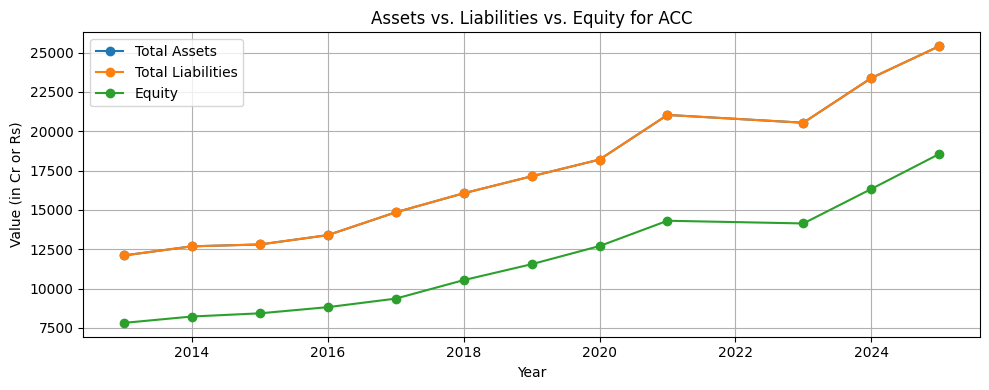

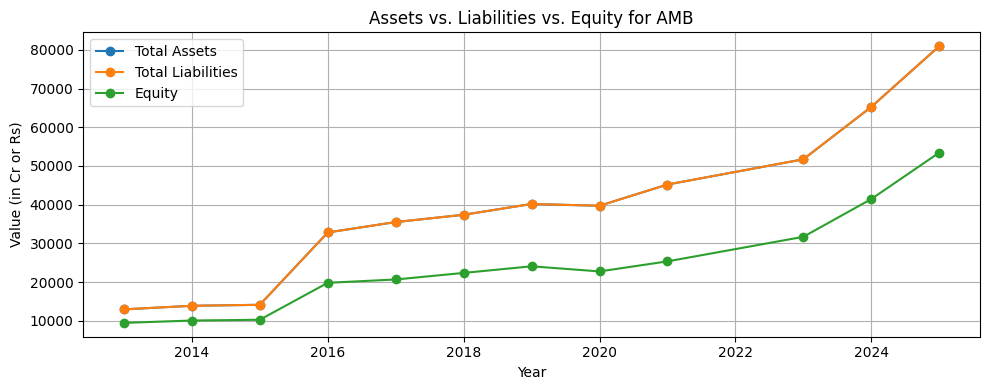

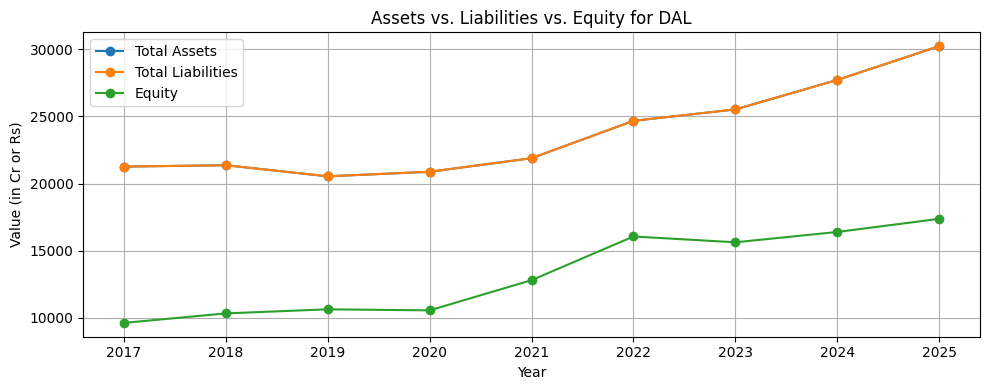

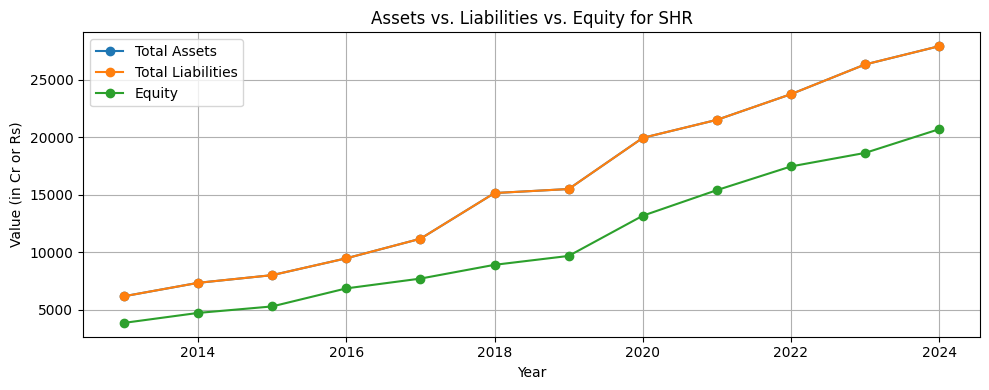

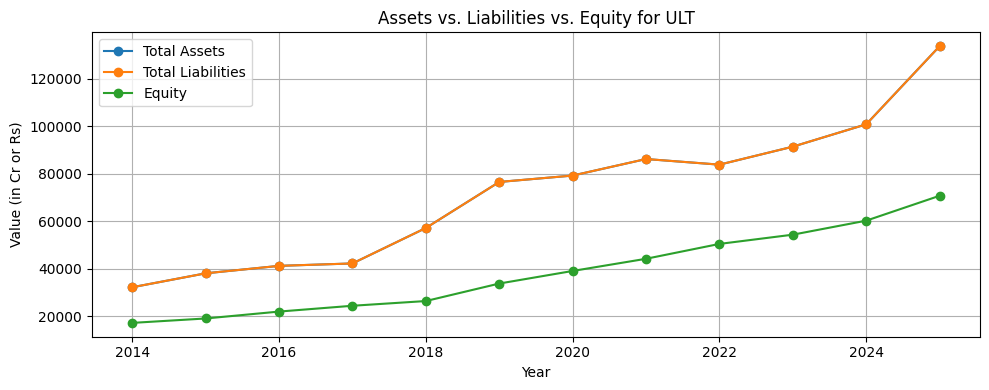

In [6]:
import matplotlib.pyplot as plt

# Loop over each company and plot
for company in pivot['Company_Code'].unique():
    company_data = pivot[pivot['Company_Code'] == company]

    plt.figure(figsize=(10, 4))
    plt.plot(company_data['Year'], company_data['Total Assets'], label='Total Assets', marker='o')
    plt.plot(company_data['Year'], company_data['Total Liabilities'], label='Total Liabilities', marker='o')
    plt.plot(company_data['Year'], company_data['Equity'], label='Equity', marker='o')

    plt.title(f"Assets vs. Liabilities vs. Equity for {company}")
    plt.xlabel("Year")
    plt.ylabel("Value (in Cr or Rs)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Column chart for Debt-Equity Ratio per company per year.




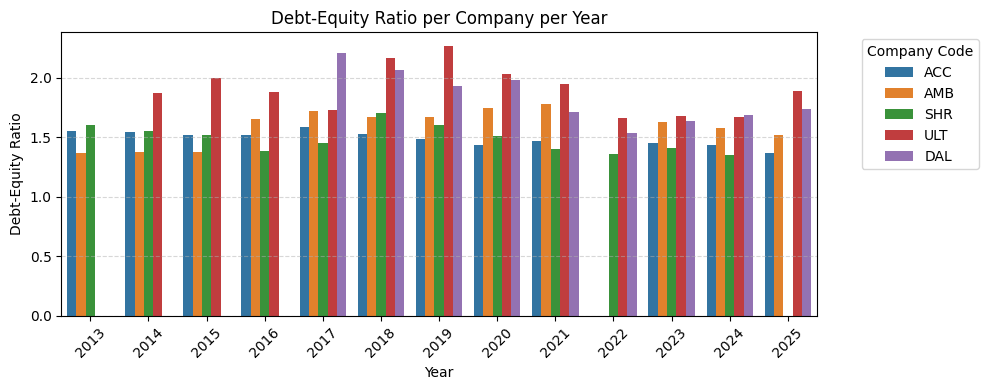

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame called 'pivot' with the following columns:
# 'Company_Code', 'Year', 'Total Liabilities', 'Equity'

# Step 1: Compute Debt-Equity Ratio
pivot['Debt_Equity_Ratio'] = pivot['Total Liabilities'] / pivot['Equity']
pivot = pivot.replace([float('inf'), -float('inf')], pd.NA)

# Step 2: Drop rows with missing ratio
de_ratio_df = pivot[['Company_Code', 'Year', 'Debt_Equity_Ratio']].dropna()

# Step 3: Plot using seaborn
plt.figure(figsize=(10, 4))
sns.barplot(data=de_ratio_df, x='Year', y='Debt_Equity_Ratio', hue='Company_Code')

plt.title("Debt-Equity Ratio per Company per Year")
plt.xlabel("Year")
plt.ylabel("Debt-Equity Ratio")
plt.xticks(rotation=45)
plt.legend(title="Company Code", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
print("Hello")